# Homework - 4
***
**Name**: Ilamvazhuthy Subbiah
***

This assignment is due on Canvas by **5pm on Friday November 16th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

## Kernels [5 - points]

**Q:** We have seen two different definitions of kernels during the course:
* Definition 1: $K(x, x^{\prime})$ is a kernel if it can be written as an inner product $\phi(x)^T\phi(x^{\prime})$ for some feature mapping $x \rightarrow \phi(x)$.
* Definition 2: $K(x, x^{\prime})$ is a kernel if for any finite set of training examples $x_1, \cdots, x_n$, the $n \times n$ matrix __K__ such that $K_{ij} = K(x_i, x_j)$ is positive semidefinite

Show that definition 1 implies definition 2.

_Hint:_ you could show this by proving that for real numbers $\alpha_1, \cdots, \alpha_n$ and points $x_1, \cdots, x_n$,
$$ \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jK(x_i, x_j) \geq 0$$
if the kernel can be written as $K(x, x^{\prime}) = \phi(x)^T\phi(x^{\prime})$

> The matrix $K$ is positive semidefinite if $K$ is symmetric and $\alpha^T K \alpha \geq 0$, where $\alpha$ is a vector of size $n$ of any real numbers.

> $$K_{ij} = K(x_i, x_j) = \phi(x_i)^T\phi(x_j) = \phi(x_j)^T\phi(x_i) = K(x_j, x_i)$$
Hence $K$ is symmetric.

> $$\alpha^T K \alpha = \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jK(x_i, x_j)$$

>By Definition 1, we have

> $$\implies \alpha^T K \alpha = \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_j\phi(x_i)^T \phi(x_j)$$

> $$\implies \alpha^T K \alpha = \bigg(\sum_{i=1}^n\alpha_i\phi(x_i)^T \bigg)\bigg(\sum_{j=1}^n\alpha_j\phi(x_j)\bigg)$$

> $$\implies \alpha^T K \alpha = \bigg|\bigg|\bigg(\sum_{j=1}^n\alpha_j\phi(x_j) \bigg)\bigg|\bigg|^2 \geq 0$$

>Therefore, $K$ is positive semidefinite. Hence, definition 1 implies definition 2.

**Q:** One way to construct kernels is to build them from simpler ones. We have already seen three possible "composition rules": assuming $K_1(x, x^\prime)$ and $K_2(x, x^\prime)$ are kernels, then the following are also kernels:
* (scaling) $f(x)K_1(x, x^\prime)f(x^\prime), \ f(x) \in \mathbb R$
* (sum) $K_1(x, x^\prime) + K_2(x, x^\prime)$
* (product) $K_1(x, x^\prime)K_2(x, x^\prime)$

(a) Let $\phi^{(1)}(x)$ and $\phi^{(2)}(x)$ be the feature vectors corresponding to kernels $K_1(x, x^\prime)$ and $K_2(x, x^\prime)$, respectively. These feature vectors may be of different length. Show that the product $K_1(x, x^\prime)K_2(x, x^\prime)$ is a kernel by showing that its feature vectors are given by $\phi(x)$ whose $(i, j)^{th}$ component (double indexed vector) is $\phi_i^{(1)}(x)\phi_j^{(2)}(x)$.

(b) Use the composition rules to build a normalized cubic polynomial kernel defined as:
$$K(x, x^\prime) = \bigg( 1 + \bigg(\frac{x}{||x||}\bigg)^T\bigg(\frac{x^\prime}{||x^\prime||}\bigg)\bigg)^3$$

You can assume that you already have a constant kernel $K_0(x, x^\prime) = 1$ and a linear kernel $K_1(x, x^\prime) = x^Tx^\prime$. Identify which rules you are employing at each step.

> (a) Assuming $\phi^{(1)}(x) \in \mathbb R^n$ and $\phi^{(2)}(x) \in \mathbb R^m$, we have

>$$K_1(x, x') = \phi^{(1)}(x)^T\phi^{(1)}(x') = \sum_{i=1}^n\phi_i^{(1)}(x)\phi_i^{(1)}(x')$$

>Similarly,

>$$K_2(x, x') = \phi^{(2)}(x)^T\phi^{(2)}(x') = \sum_{j=1}^m\phi_j^{(2)}(x)\phi_j^{(2)}(x')$$

>$$\implies K_1(x, x')K_2(x, x') = \sum_{i=1}^n\phi_i^{(1)}(x)\phi_i^{(1)}(x') \sum_{j=1}^m\phi_j^{(2)}(x)\phi_j^{(2)}(x')$$

>$$\implies K_1(x, x')K_2(x, x') = \sum_{i=1}^n\sum_{j=1}^m\bigg(\phi_i^{(1)}(x) \phi_j^{(2)}(x)\bigg)\bigg(\phi_i^{(1)}(x') \phi_j^{(2)}(x')\bigg)$$

>$$\implies K_1(x, x')K_2(x, x') = \sum_{k=1}^{n\times m}\phi_k(x) \phi_k(x') = \phi(x)^T\phi(x')$$

>where $\phi_k(x) = \phi_i^{(1)}(x)\phi_j^{(2)}(x)$ and $k = i\times j$. Hence, the product $K_1(x, x')K_2(x, x')$ is a kernel.

>(b) Scaling: 

>$$f(x) = \frac{1}{||x||}$$

>$$K_2(x,x') = \frac{1}{||x||}K_1(x,x')\frac{1}{||x'||} = \bigg(\frac{x}{||x||}\bigg)^T\bigg(\frac{x^\prime}{||x^\prime||}\bigg)$$

>Sum:

>$$K_3(x, x') = K_0(x, x') + K_2(x, x') = \bigg( 1 + \bigg(\frac{x}{||x||}\bigg)^T\bigg(\frac{x^\prime}{||x^\prime||}\bigg)\bigg)$$

>Product: 

>$$K_4(x, x') = K_3(x, x') K_3(x, x')$$

>Therefore,

>$$K(x,x') = K_4(x, x') K_3(x, x') = \bigg( 1 + \bigg(\frac{x}{||x||}\bigg)^T\bigg(\frac{x^\prime}{||x^\prime||}\bigg)\bigg)^3$$

## Vapnik–Chervonenkis Dimension [ 5 - points]

**Q:** Let the input space be the real line, and let $H$ be the hypothesis class of _intervals_. That is, each hypothesis $h$ is associated with a close interval $[a, b]$, for some constants $a \leq b$, and $h(x)$ = $1$ if and only if _x_ lies within this interval, and $0$ otherwise. What is the VC dimension of $H$? Prove that your answer is correct.

> We can easily see that $H$ can shatter 2 points. Consider, $x_1 \leq x_2$. The possible labellings are 

>$$y = (1, 1) \implies a \leq x_1 \leq x_2 \leq b$$
>$$y = (1, 0) \implies a \leq x_1 \leq b < x_2$$
>$$y = (0, 1) \implies x_1 < a \leq x_2 \leq b$$
>$$y = (0, 0) \implies x_1 \leq x_2 < a \leq b \,or\, a \leq b < x_1 \leq x_2$$

> Hence the $VCdim(H) \geq 2$.

>Now we can show that $VCdim(H) <3$.

> Let $x_1, x_2, x_3$ be arbitrary points on the real line such that $x_1 \leq x_2 \leq x_3$. Let $y = (1, 0, 1)$ be the labelling of the points.

> Let's assume there is a hypothesis $h$ that can shatter the three points.

>$$y_1 = 1 \implies a \leq x_1$$

>$$Y_3 = 1 \implies x_3 \leq b$$

>We also have, 

>$$x_1 \leq x_2 \leq x_3$$

>Therefore, 

>$$a \leq x_1 \leq x_2 \leq x_3 \leq b$$

>This means $y_2 = 1$ as well. But $y_2 = 0$, which is a contradiction. Hence, the three points cannot be shattered by the hypothesis class $H$. Hence the VC dimension of $H$ is 2.


**Q:** Let the input space be the real line, and let $H$ be the hypothesis class of _unions of k intervals_. That is, each hypothesis $h$ is associated with *k* closed intervals $[a_1, b_1], \cdots, [a_k, b_k]$ (for constants $a_1 \leq b_1 \leq \cdots \leq a_k \leq b_k$); and $h(x) = 1$ if and only if _x_ lies in the union of these intervals, and $0$ otherwise. What is the VC dimension of $H$? Justify your answer.

>We can easily see that $2k$ points can be shattered using k intervals as we can shatter each of the k pairs of consecutive points with an interval.

>But, If we have $2k+1$ points labelled alternatively (starting with a label of 1), we cannot shatter them using the k intervals.

> Hence, the VC dimension of H is $2k$. 

## LASSO and Ridge regression - [15 points]

We have seen that the difference between LASSO and Ridge regression is due to their different regularization model (L1 norm vs. L2 norm). The regularization term in LASSO is $\lambda||\mathbf w||_1$, while the regularization term in ridge regression is  $(\lambda/2)||\mathbf w||^2$ (where $\mathbf w$ denotes the set of parameters for the linear regression model and $\lambda$ is the trade-off regularization parameter). LASSO typically enforces more _sparsity_ on the resulting $\mathbf w$. That is, the resulting classifier will have a small number of non-zero weights. In this exercise, you'll explore differences in performance between LASSO and Ridge regression algorithms.

You will be using the following data sets:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
class DataA:
    def __init__(self):
        f = lambda x, y : np.random.randn(x, y)
        self.train_x = f(1000, 20)
        self.train_y = f(1000, 1)
        self.test_x = f(500, 20)
        self.test_y = f(500, 1)
        
class DataB:
    def __init__(self):
        # Data from: https://archive.ics.uci.edu/ml/datasets/Cloud
        data = np.fromfile("data/cloud.data", sep = " ").reshape((1024, 10))
        y = data[:, 6]
        X = np.delete(data, 6, axis = 1)
        
        self.train_x = X[:800]
        self.train_y = y[:800]
        
        self.test_x = X[800:]
        self.test_y = y[800:]
        
class DataC:
    def __init__(self):
        # Data from: http://archive.ics.uci.edu/ml/datasets/Forest+Fires
        data = pd.read_csv("data/forestfires.csv")
        data = data.sample(frac = 1).reset_index(drop = True).drop(columns = ["month", "day"])
        data["area"] = np.log(data["area"] + 1)
        X = data.drop(columns = "area").values
        y = data["area"].values
        
        self.train_x = X[:400]
        self.train_y = y[:400]
        
        self.test_x = X[400:]
        self.test_y = y[400:]

In [4]:
data_a = DataA()
data_b = DataB()
data_c = DataC()

**For each of the data sets (DataA, DataB, DataC) above, answer the following questions:** 

1. Fit a regressor to the data set using the sklearn's `Lasso` module (for more details, read [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)):
    1. Train a LASSO model using 5 different values for the regularization parameter $\lambda$. Use $\lambda = 0.01, 0.05, 0.1, 0.2, 0.3$. Report and plot the number of non-zero coefficients.
    2. Report the value of $\lambda$ that yields the minimum number of non-zero coefficients in the resulting $\mathbf w$, and report the number of non-zero coefficients in that case. Keep track of this $\mathbf w$, we will refer to it as $\mathbf w_b$. [This step is only needed if any $\mathbf{w}$ has coefficients that are 0.]
    3. For each of the classifiers learned in part (A), compute their test error as mean-squared-error. Plot the test error as function of $\lambda$.
    4. Report the value of $\lambda$ that yields the $\mathbf w$ with the minimum test error. Save this $\mathbf w$ as $\mathbf w_d$. How many non-zero coordinates does $\mathbf w_d$ have? Keep track of this, as well as the answers for $\mathbf w_b$ for the comparison to Ridge Regression below. It might be helpful to make a table, i.e. the number of non-zero coordinates and the test error for $\mathbf w_b$ and $\mathbf w_d$ for each data set.
    5. For data set A, by increasing the value of $\lambda$, can you get most of the entries to be 0? Can you get every entry to be 0?
    
Note: $\lambda$ is same as $\alpha$ in the sklearn module.

In [5]:
# Part A - Create models and fit

from sklearn import linear_model
lamb = [0.01, 0.05, 0.1, 0.2, 0.3]

clf_a = []
clf_b = []
clf_c = []
for i in range(len(lamb)):
    clf_a.append(linear_model.Lasso(alpha = lamb[i]))
    clf_b.append(linear_model.Lasso(alpha = lamb[i]))
    clf_c.append(linear_model.Lasso(alpha = lamb[i]))

for i in range(len(lamb)):
    clf_a[i].fit(data_a.train_x, data_a.train_y)
    clf_b[i].fit(data_b.train_x, data_b.train_y)
    clf_c[i].fit(data_c.train_x, data_c.train_y)    

In [6]:
# Part A - Find the number of non-zero coefficients for all three datasets for all values of lambda

non_zero_coeff = {}
non_zero_coeff['a'] = []
non_zero_coeff['b'] = []
non_zero_coeff['c'] = []
for i in range(len(lamb)):
    count = 0
    for c in clf_a[i].coef_:
        if c != 0:
            count += 1
    non_zero_coeff['a'].append(count)
    
    count = 0
    for c in clf_b[i].coef_:
        if c != 0:
            count += 1
    non_zero_coeff['b'].append(count)
    
    count = 0
    for c in clf_c[i].coef_:
        if c != 0:
            count += 1
    non_zero_coeff['c'].append(count)

For Lambda = 0.01 the no of non-zero coeffs for the data set A = 11 , data set B = 9 , data set C = 10
For Lambda = 0.05 the no of non-zero coeffs for the data set A = 0 , data set B = 7 , data set C = 8
For Lambda = 0.1 the no of non-zero coeffs for the data set A = 0 , data set B = 7 , data set C = 6
For Lambda = 0.2 the no of non-zero coeffs for the data set A = 0 , data set B = 7 , data set C = 4
For Lambda = 0.3 the no of non-zero coeffs for the data set A = 0 , data set B = 6 , data set C = 3


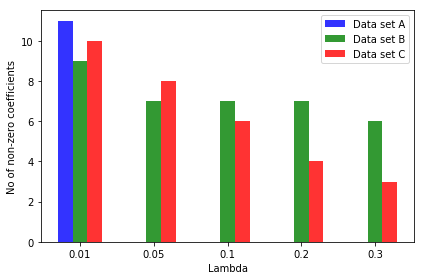

In [7]:
# Part A - Reporting and plotting the no of non-zero coefficients

for i in range(len(lamb)):
    print("For Lambda =", lamb[i], "the no of non-zero coeffs for the data set A =", non_zero_coeff['a'][i],\
          ", data set B =", non_zero_coeff['b'][i], ", data set C =", non_zero_coeff['c'][i])
    
n_groups = 5
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
 
rects1 = plt.bar(index, non_zero_coeff['a'], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Data set A')
 
rects2 = plt.bar(index + bar_width, non_zero_coeff['b'], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Data set B')

rects3 = plt.bar(index + 2*bar_width, non_zero_coeff['c'], bar_width,
                 alpha=opacity,
                 color='r',
                 label='Data set C')
 
plt.xlabel('Lambda')
plt.ylabel('No of non-zero coefficients')
plt.xticks(index + bar_width, lamb)
plt.legend()
 
plt.tight_layout()
plt.show()

In [8]:
# Part B - lambda which yields the minimum no of non-zero coefficients

wb_lasso = {}
min_index_a = 0
min_index_b = 0
min_index_c = 0
for i in range(len(lamb)):
    if(non_zero_coeff['a'][i] < non_zero_coeff['a'][min_index_a] ):
        min_index_a = i
    if(non_zero_coeff['b'][i] < non_zero_coeff['b'][min_index_b]):
        min_index_b = i
    if(non_zero_coeff['c'][i] < non_zero_coeff['c'][min_index_c]):
        min_index_c = i
wb_lasso['a'] = clf_a[min_index_a].coef_
wb_lasso['b'] = clf_b[min_index_b].coef_
wb_lasso['c'] = clf_c[min_index_c].coef_

In [9]:
print("Dataset A: The value of lambda with the minimum non-zero coefficient is", lamb[min_index_a], "and the \
no of non-zero coefficients is", non_zero_coeff['a'][min_index_a])
print("Dataset B: The value of lambda with the minimum non-zero coefficient is", lamb[min_index_b], "and the \
no of non-zero coefficients is", non_zero_coeff['b'][min_index_b])
print("Dataset C: The value of lambda with the minimum non-zero coefficient is", lamb[min_index_c], "and the \
no of non-zero coefficients is", non_zero_coeff['c'][min_index_c])

Dataset A: The value of lambda with the minimum non-zero coefficient is 0.05 and the no of non-zero coefficients is 0
Dataset B: The value of lambda with the minimum non-zero coefficient is 0.3 and the no of non-zero coefficients is 6
Dataset C: The value of lambda with the minimum non-zero coefficient is 0.3 and the no of non-zero coefficients is 3


In [10]:
# Part-C Calculate the mean squared error on the test set

error = {}
error['a'] = []
error['b'] = []
error['c'] = []
for i in range(len(lamb)):
    y_predict = clf_a[i].predict(data_a.test_x)
    error['a'].append(np.linalg.norm(data_a.test_y-y_predict)/len(y_predict))
    
    y_predict = clf_b[i].predict(data_b.test_x)
    error['b'].append(np.linalg.norm(data_b.test_y-y_predict)/len(y_predict))
    
    y_predict = clf_c[i].predict(data_c.test_x)
    error['c'].append(np.linalg.norm(data_c.test_y-y_predict)/len(y_predict))

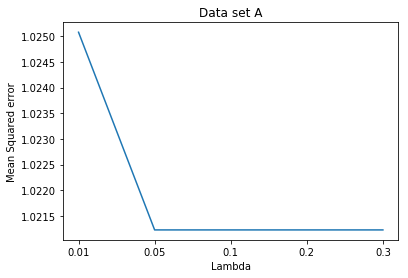

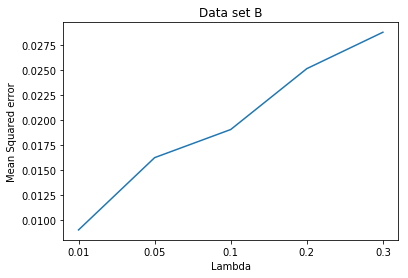

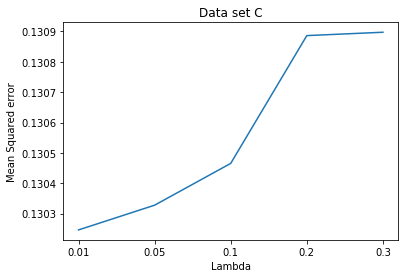

In [11]:
# Part-C Plot the error vs Lambda for all the datasets.
y_pos = np.arange(len(lamb))
plt.plot(y_pos, error['a'])
plt.xticks(y_pos, lamb)
plt.ylabel('Mean Squared error')
plt.xlabel('Lambda')
plt.title('Data set A')
plt.show()

plt.xticks(y_pos, lamb)
plt.ylabel('Mean Squared error')
plt.xlabel('Lambda')
plt.title("Data set B")
plt.plot(y_pos, error['b'])
plt.show()

plt.xticks(y_pos, lamb)
plt.ylabel('Mean Squared error')
plt.xlabel('Lambda')
plt.title("Data set C")
plt.plot(y_pos, error['c'])
plt.show()

In [12]:
# Part D - lambda which yields the minimum test error
wd_lasso = {}
min_index_error_a = 0
min_index_error_b = 0
min_index_error_c = 0
for i in range(len(lamb)):
    if(error['a'][i] < error['a'][min_index_error_a] ):
        min_index_error_a = i
    if(error['b'][i] < error['b'][min_index_error_b]):
        min_index_error_b = i
    if(error['c'][i] < error['c'][min_index_error_c]):
        min_index_error_c = i
wd_lasso['a'] = clf_a[min_index_error_a].coef_
wd_lasso['b'] = clf_b[min_index_error_b].coef_
wd_lasso['c'] = clf_c[min_index_error_c].coef_

print("Dataset A: The value of lambda with the minimum test error is", lamb[min_index_error_a], "and the \
no of non-zero coefficients is", non_zero_coeff['a'][min_index_error_a])
print("Dataset B: The value of lambda with the minimum test error is", lamb[min_index_error_b], "and the \
no of non-zero coefficients is", non_zero_coeff['b'][min_index_error_b])
print("Dataset C: The value of lambda with the minimum test error is", lamb[min_index_error_c], "and the \
no of non-zero coefficients is", non_zero_coeff['c'][min_index_error_c])

Dataset A: The value of lambda with the minimum test error is 0.05 and the no of non-zero coefficients is 0
Dataset B: The value of lambda with the minimum test error is 0.01 and the no of non-zero coefficients is 9
Dataset C: The value of lambda with the minimum test error is 0.01 and the no of non-zero coefficients is 10


Part E : Yes, for dataset A, most entries become zero as $\lambda$ increases. It is also possible to get all the entries to be zero. For this particular case, all the entries are zero for $\lambda = 0.05, 0.1, 0.2, 0.3$.

2. Now, we turn to Ridge regression. We'll use sklearn module `Ridge` (read more [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)). Repeat each of the experiment above using Ridge regression. Use $\lambda = 1, 50, 100, 200, 1000$.

In [13]:
# Part A - Create models and fit

from sklearn import linear_model
lamb = [1, 50, 100, 200, 1000]

clf_a = []
clf_b = []
clf_c = []
for i in range(len(lamb)):
    clf_a.append(linear_model.Ridge(alpha = lamb[i]))
    clf_b.append(linear_model.Ridge(alpha = lamb[i]))
    clf_c.append(linear_model.Ridge(alpha = lamb[i]))

for i in range(len(lamb)):
    clf_a[i].fit(data_a.train_x, data_a.train_y)
    clf_b[i].fit(data_b.train_x, data_b.train_y)
    clf_c[i].fit(data_c.train_x, data_c.train_y) 

In [14]:
# Part A - Find the number of non-zero coefficients for all three datasets for all values of lambda

non_zero_coeff_ridge = {}
non_zero_coeff_ridge['a'] = []
non_zero_coeff_ridge['b'] = []
non_zero_coeff_ridge['c'] = []
for i in range(len(lamb)):
    count = 0
    for c in clf_a[i].coef_.reshape(-1):
        if c != 0:
            count += 1
    non_zero_coeff_ridge['a'].append(count)
    
    count = 0
    for c in clf_b[i].coef_:
        if c != 0:
            count += 1
    non_zero_coeff_ridge['b'].append(count)
    
    count = 0
    for c in clf_c[i].coef_:
        if c != 0:
            count += 1
    non_zero_coeff_ridge['c'].append(count)

For Lambda = 1 the no of non-zero coeffs for the data set A = 20 , data set B = 9 , data set C = 10
For Lambda = 50 the no of non-zero coeffs for the data set A = 20 , data set B = 9 , data set C = 10
For Lambda = 100 the no of non-zero coeffs for the data set A = 20 , data set B = 9 , data set C = 10
For Lambda = 200 the no of non-zero coeffs for the data set A = 20 , data set B = 9 , data set C = 10
For Lambda = 1000 the no of non-zero coeffs for the data set A = 20 , data set B = 9 , data set C = 10


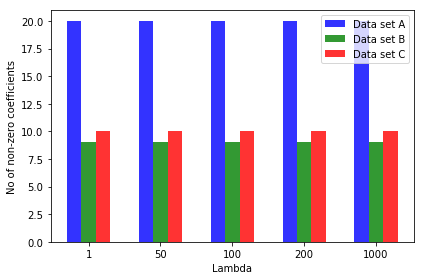

In [15]:
# Part A - Reporting and plotting the no of non-zero coefficients

for i in range(len(lamb)):
    print("For Lambda =", lamb[i], "the no of non-zero coeffs for the data set A =", non_zero_coeff_ridge['a'][i],\
          ", data set B =", non_zero_coeff_ridge['b'][i], ", data set C =", non_zero_coeff_ridge['c'][i])
    
n_groups = 5
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
 
rects1 = plt.bar(index, non_zero_coeff_ridge['a'], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Data set A')
 
rects2 = plt.bar(index + bar_width, non_zero_coeff_ridge['b'], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Data set B')

rects3 = plt.bar(index + 2*bar_width, non_zero_coeff_ridge['c'], bar_width,
                 alpha=opacity,
                 color='r',
                 label='Data set C')
 
plt.xlabel('Lambda')
plt.ylabel('No of non-zero coefficients')
plt.xticks(index + bar_width, lamb)
plt.legend()
 
plt.tight_layout()
plt.show()

In [16]:
# Part B - lambda which yields the minimum no of non-zero coefficients

wb_ridge = {}
min_index_ridge_a = 0
min_index_ridge_b = 0
min_index_ridge_c = 0
for i in range(len(lamb)):
    if(non_zero_coeff_ridge['a'][i] < non_zero_coeff_ridge['a'][min_index_ridge_a] ):
        min_index_ridge_a = i
    if(non_zero_coeff_ridge['b'][i] < non_zero_coeff_ridge['b'][min_index_ridge_b]):
        min_index_ridge_b = i
    if(non_zero_coeff_ridge['c'][i] < non_zero_coeff_ridge['c'][min_index_ridge_c]):
        min_index_ridge_c = i
wb_ridge['a'] = clf_a[min_index_ridge_a].coef_
wb_ridge['b'] = clf_b[min_index_ridge_b].coef_
wb_ridge['c'] = clf_c[min_index_ridge_c].coef_

print("Dataset A: The value of lambda with the minimum non-zero coefficient is", lamb[min_index_ridge_a], "and the \
no of non-zero coefficients is", non_zero_coeff_ridge['a'][min_index_ridge_a])
print("Dataset B: The value of lambda with the minimum non-zero coefficient is", lamb[min_index_ridge_b], "and the \
no of non-zero coefficients is", non_zero_coeff_ridge['b'][min_index_ridge_b])
print("Dataset C: The value of lambda with the minimum non-zero coefficient is", lamb[min_index_ridge_c], "and the \
no of non-zero coefficients is", non_zero_coeff_ridge['c'][min_index_ridge_c])

Dataset A: The value of lambda with the minimum non-zero coefficient is 1 and the no of non-zero coefficients is 20
Dataset B: The value of lambda with the minimum non-zero coefficient is 1 and the no of non-zero coefficients is 9
Dataset C: The value of lambda with the minimum non-zero coefficient is 1 and the no of non-zero coefficients is 10


In [17]:
# Part-C Calculate the mean squared error on the test set

error_ridge = {}
error_ridge['a'] = []
error_ridge['b'] = []
error_ridge['c'] = []
for i in range(len(lamb)):
    y_predict = clf_a[i].predict(data_a.test_x)
    error_ridge['a'].append(np.linalg.norm(data_a.test_y-y_predict)/len(y_predict))
    
    y_predict = clf_b[i].predict(data_b.test_x)
    error_ridge['b'].append(np.linalg.norm(data_b.test_y-y_predict)/len(y_predict))
    
    y_predict = clf_c[i].predict(data_c.test_x)
    error_ridge['c'].append(np.linalg.norm(data_c.test_y-y_predict)/len(y_predict))

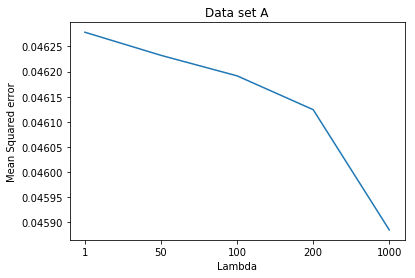

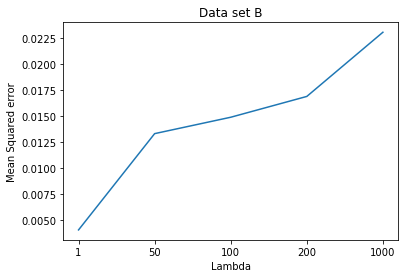

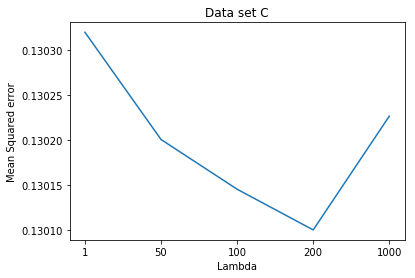

In [18]:
# Part-C Plot the error vs Lambda for all the datasets.
y_pos = np.arange(len(lamb))
plt.plot(y_pos, error_ridge['a'])
plt.xticks(y_pos, lamb)
plt.ylabel('Mean Squared error')
plt.xlabel('Lambda')
plt.title('Data set A')
plt.show()

plt.xticks(y_pos, lamb)
plt.ylabel('Mean Squared error')
plt.xlabel('Lambda')
plt.title("Data set B")
plt.plot(y_pos, error_ridge['b'])
plt.show()

plt.xticks(y_pos, lamb)
plt.ylabel('Mean Squared error')
plt.xlabel('Lambda')
plt.title("Data set C")
plt.plot(y_pos, error_ridge['c'])
plt.show()

In [24]:
# Part D - lambda which yields the minimum test error
wd_ridge = {}
min_index_error_ridge_a = 0
min_index_error_ridge_b = 0
min_index_error_ridge_c = 0
for i in range(len(lamb)):
    if(error['a'][i] < error_ridge['a'][min_index_error_ridge_a] ):
        min_index_error_ridge_a = i
    if(error_ridge['b'][i] < error_ridge['b'][min_index_error_ridge_b]):
        min_index_error_ridge_b = i
    if(error_ridge['c'][i] < error_ridge['c'][min_index_error_ridge_c]):
        min_index_error_ridge_c = i
wd_ridge['a'] = clf_a[min_index_error_ridge_a].coef_
wd_ridge['b'] = clf_b[min_index_error_ridge_b].coef_
wd_ridge['c'] = clf_c[min_index_error_ridge_c].coef_

print("Dataset A: The value of lambda with the minimum test error is", lamb[min_index_error_ridge_a], "and the \
no of non-zero coefficients is", non_zero_coeff_ridge['a'][min_index_error_ridge_a])
print("Dataset B: The value of lambda with the minimum test error is", lamb[min_index_error_ridge_b], "and the \
no of non-zero coefficients is", non_zero_coeff_ridge['b'][min_index_error_ridge_b])
print("Dataset C: The value of lambda with the minimum test error is", lamb[min_index_error_ridge_c], "and the \
no of non-zero coefficients is", non_zero_coeff_ridge['c'][min_index_error_ridge_c])

Dataset A: The value of lambda with the minimum test error is 1 and the no of non-zero coefficients is 20
Dataset B: The value of lambda with the minimum test error is 1 and the no of non-zero coefficients is 9
Dataset C: The value of lambda with the minimum test error is 200 and the no of non-zero coefficients is 10


Part E : No, for dataset A, the entries do not become zero as $\lambda$ increases. 

3. Compare the two algorithms on each data set: compare the number of non-zero coordinates of the $\mathbf w_d$'s, and compare the test error rates of the $\mathbf w_b$'s. Report your results and comment on them.

In [25]:
df = pd.DataFrame({'': ['No of non-zero coordinates in wd', 'No of non-zero coordinates in wb' \
                        ,'Test Error wd', 'Test Error wb'],
                   'Lasso': [non_zero_coeff['a'][min_index_error_a], non_zero_coeff['a'][min_index_a] \
                             , error['a'][min_index_error_a], error['a'][min_index_a]],
                   'Ridge':[non_zero_coeff_ridge['a'][min_index_error_ridge_a], non_zero_coeff_ridge['a'][min_index_ridge_a] \
                             , error_ridge['a'][min_index_error_ridge_a], error_ridge['a'][min_index_ridge_a]]})
df.set_index('')
print("Dataset A")
print(df)

df = pd.DataFrame({'': ['No of non-zero coordinates in wd', 'No of non-zero coordinates in wb' \
                        ,'Test Error wd', 'Test Error wb'],
                   'Lasso': [non_zero_coeff['b'][min_index_error_b], non_zero_coeff['b'][min_index_b] \
                             , error['b'][min_index_error_b], error['b'][min_index_b]],
                   'Ridge':[non_zero_coeff_ridge['b'][min_index_error_ridge_b], non_zero_coeff_ridge['b'][min_index_ridge_b] \
                             , error_ridge['b'][min_index_error_ridge_b], error_ridge['b'][min_index_ridge_b]]})
df.set_index('')
print("\nDataset B")
print(df)

df = pd.DataFrame({'': ['No of non-zero coordinates in wd', 'No of non-zero coordinates in wb' \
                        ,'Test Error wd', 'Test Error wb'],
                   'Lasso': [non_zero_coeff['c'][min_index_error_c], non_zero_coeff['c'][min_index_c] \
                             , error['c'][min_index_error_c], error['c'][min_index_c]],
                   'Ridge':[non_zero_coeff_ridge['c'][min_index_error_ridge_c], non_zero_coeff_ridge['c'][min_index_ridge_c] \
                             , error_ridge['c'][min_index_error_ridge_c], error_ridge['c'][min_index_ridge_c]]})
df.set_index('')
print("\nDataset C")
print(df)

Dataset A
                                        Lasso      Ridge
0  No of non-zero coordinates in wd  0.000000  20.000000
1  No of non-zero coordinates in wb  0.000000  20.000000
2                     Test Error wd  1.021225   0.046278
3                     Test Error wb  1.021225   0.046278

Dataset B
                                        Lasso     Ridge
0  No of non-zero coordinates in wd  9.000000  9.000000
1  No of non-zero coordinates in wb  6.000000  9.000000
2                     Test Error wd  0.009026  0.004053
3                     Test Error wb  0.028782  0.004053

Dataset C
                                         Lasso     Ridge
0  No of non-zero coordinates in wd  10.000000  10.00000
1  No of non-zero coordinates in wb   3.000000  10.00000
2                     Test Error wd   0.130246   0.13010
3                     Test Error wb   0.130897   0.13032


>The no of non-zero coordinates in $w_d$ of Lasso is equal to the no of non-zero coordinates in $w_d$ of Ridge for all the datasets.

>The no of non-zero coordinates in $w_b$ of Lasso is generally lower than the no of non-zero corrdinates in $w_b$ of Ridge. This is because Lasso forces the coordinates to go to zero as the value of $\lambda$ increases.

> The test error rates for both $w_d$ and $w_b$ are generally higher for Lasso than Ridge. This is because, Lasso again forces the coordinates to go to zeros and is not able learn complicated models.

## Kernel Perceptron - 5 points

Implement the Kernel Perceptron as described in the lecture using different kernel functions. Use the training and test data provided below to train and test your implementation. Report the error rate for each kernel function.

In [299]:
from scipy.io import loadmat
class Data:
    def __init__(self):
        ff = lambda x,y : loadmat(x)[y]
        
        self.X_train = ff("data/iris_3/train_data.mat", "train_data")
        self.y_train = ff("data/iris_3/train_labels.mat", "train_labels").flatten()
        
        self.X_test = ff("data/iris_3/test_data.mat", "test_data")
        self.y_test = ff("data/iris_3/test_labels.mat", "test_labels").flatten()

**A:** Implement the kernel functions below:

In [290]:
import numpy as np
from numpy import linalg

def linear_kernel(x1, x2):
    return np.dot(x1, x2)
    
def polynomial_kernel(x, y, p = 3):
    return (1+ np.dot(x, y))**p
    
def gaussian_kernel(x, y, sigma = 0.5):
    return math.exp(-np.linalg.norm(x-y)/(2 * sigma**2))
    

**B:** Implement the following methods of the `KernelPerceptron` class. The `__init__` takes also as input the kernel to use. `Niter` is equivalent to `t` as per the lecture slides. You are allowed to introduce new class variables/methods.

* Implement the `fit` method. Taking as input the training data, it learns the model parameters
* Implement the `predict` method which takes as input new examples and returns the estimated label 

In [343]:
class KernelPerceptron:
    def __init__(self, kernel = linear_kernel, Niter = 1):
        
        self.kernel = kernel
        self.Niter = Niter
        self.support_vector_x = None
        self.support_vector_y = None
        self.alpha = None
        self.X_train = None
        self.y_train = None
        
    def fit(self, X, y):
        self.alpha = np.zeros(len(X))
        self.X_train = X
        self.y_train = y
        for i in range(self.Niter):
            for j in range(len(X)):
                if y[j]*(self.compute_sum(X[j])) <= 0:
                    self.alpha[j] += 1
    
    def compute_sum(self, x_t):
        sum_ = 0
        for i in range(len(self.X_train)):
            sum_ += self.alpha[i] * self.y_train[i] * self.kernel(self.X_train[i], x_t)
        return sum_
    
    def predict(self, X):
        y_predict = np.zeros(len(X))
        for i in range(len(X)):
            if self.compute_sum(X[i]) <= 0:
                y_predict[i] = -1
            else:
                y_predict[i] = 1
        return y_predict

**C:** Report the test error for each kernel function for `Niter = 20`

In [344]:
iris = Data()

In [345]:
kp = KernelPerceptron(linear_kernel, 20)
kp.fit(iris.X_train, iris.y_train)
y_pred = kp.predict(iris.X_test)
count = 0
for i in range(len(y_pred)):
    if y_pred[i] != iris.y_test[i]:
        count += 1

print("The test error for the linear kernel is", round(count/len(y_pred), 2))

The test error for the linear kernel is 0.4


In [346]:
kp = KernelPerceptron(polynomial_kernel, 20)
kp.fit(iris.X_train, iris.y_train)
y_pred = kp.predict(iris.X_test)
count = 0
for i in range(len(y_pred)):
    if y_pred[i] != iris.y_test[i]:
        count += 1

print("The test error for the polynomial kernel is", round(count/len(y_pred), 2))

The test error for the polynomial kernel is 0.07


In [347]:
kp = KernelPerceptron(gaussian_kernel, 20)
kp.fit(iris.X_train, iris.y_train)
y_pred = kp.predict(iris.X_test)
count = 0
for i in range(len(y_pred)):
    if y_pred[i] != iris.y_test[i]:
        count += 1

print("The test error for the gaussian kernel is", round(count/len(y_pred), 2))

The test error for the gaussian kernel is 0.07
